<a href="https://colab.research.google.com/github/priti378/synthetic_seismogram1/blob/main/synthetic_seismogram_along_with_first_two_multiples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

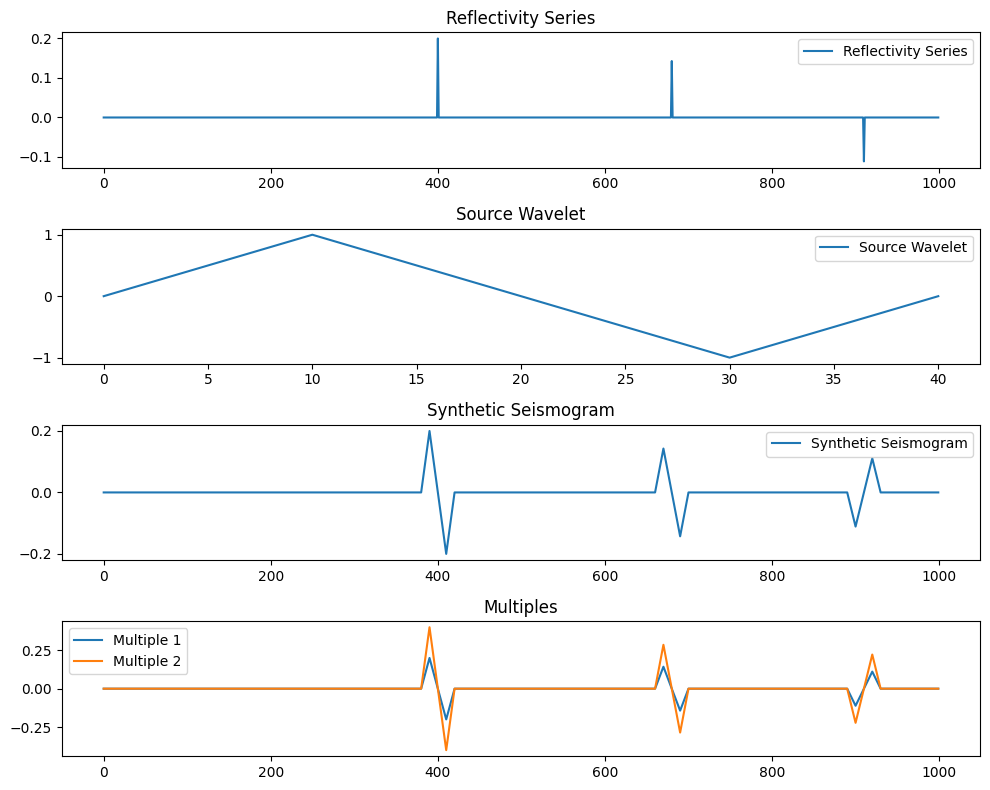

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the earth model
depths = [200, 210, 230, 250]  # Depths of the boundaries in meters
velocities = [1000, 1500, 2000, 1600, 2500]  # Velocities in m/s

# Source wavelet
source_wavelet = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0])

# Time sampling
dt = 0.001  # Sampling interval in seconds
t_max = 1.0  # Maximum time in seconds
t = np.arange(0, t_max, dt)
n_samples = len(t)

# Calculate reflectivity series
def reflectivity_series(depths, velocities, dt):
    reflectivity = np.zeros(n_samples)
    travel_time = 0.0
    for i in range(1, len(velocities)):
        travel_time += 2 * depths[i-1] / velocities[i-1]
        sample_index = int(travel_time / dt)
        if sample_index < n_samples:
            r = (velocities[i] - velocities[i-1]) / (velocities[i] + velocities[i-1])
            reflectivity[sample_index] = r
    return reflectivity

reflectivity = reflectivity_series(depths, velocities, dt)

# Generate the synthetic seismogram by convolving the reflectivity with the source wavelet
synthetic_seismogram = np.convolve(reflectivity, source_wavelet, mode='same')

# Calculate multiples
def calculate_multiples(reflectivity, dt, max_time, num_multiples=2):
    multiples = np.zeros((num_multiples, n_samples))
    for i in range(num_multiples):
        multiple_reflectivity = reflectivity * ((reflectivity != 0) * (i+1))
        multiples[i] = np.convolve(multiple_reflectivity, source_wavelet, mode='same')
    return multiples

multiples = calculate_multiples(reflectivity, dt, t_max)

# Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(reflectivity, label='Reflectivity Series')
plt.legend()
plt.title('Reflectivity Series')

plt.subplot(4, 1, 2)
plt.plot(source_wavelet, label='Source Wavelet')
plt.legend()
plt.title('Source Wavelet')

plt.subplot(4, 1, 3)
plt.plot(synthetic_seismogram, label='Synthetic Seismogram')
plt.legend()
plt.title('Synthetic Seismogram')

plt.subplot(4, 1, 4)
for i, multiple in enumerate(multiples):
    plt.plot(multiple, label=f'Multiple {i+1}')
plt.legend()
plt.title('Multiples')

plt.tight_layout()
plt.show()
